In [1]:
# 회귀와 분류
# 회귀 : 연속된 값 중 하나
# 분류 : 0 또는 1 (여러 카테고리 중 하나)

In [2]:
# 지도와 비지도
# 지도 : 정답을 주고
# 비지도 : 정답 없이

In [3]:
# 확률적 경사하강법 Stochastic Gradient Descent : SGD

In [59]:
import pandas as pd

df = pd.read_csv("houseprice.csv")

In [5]:
df.head()

,size,no_rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
df.tail()

,size,no_rooms,price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


<Axes: xlabel='size', ylabel='price'>

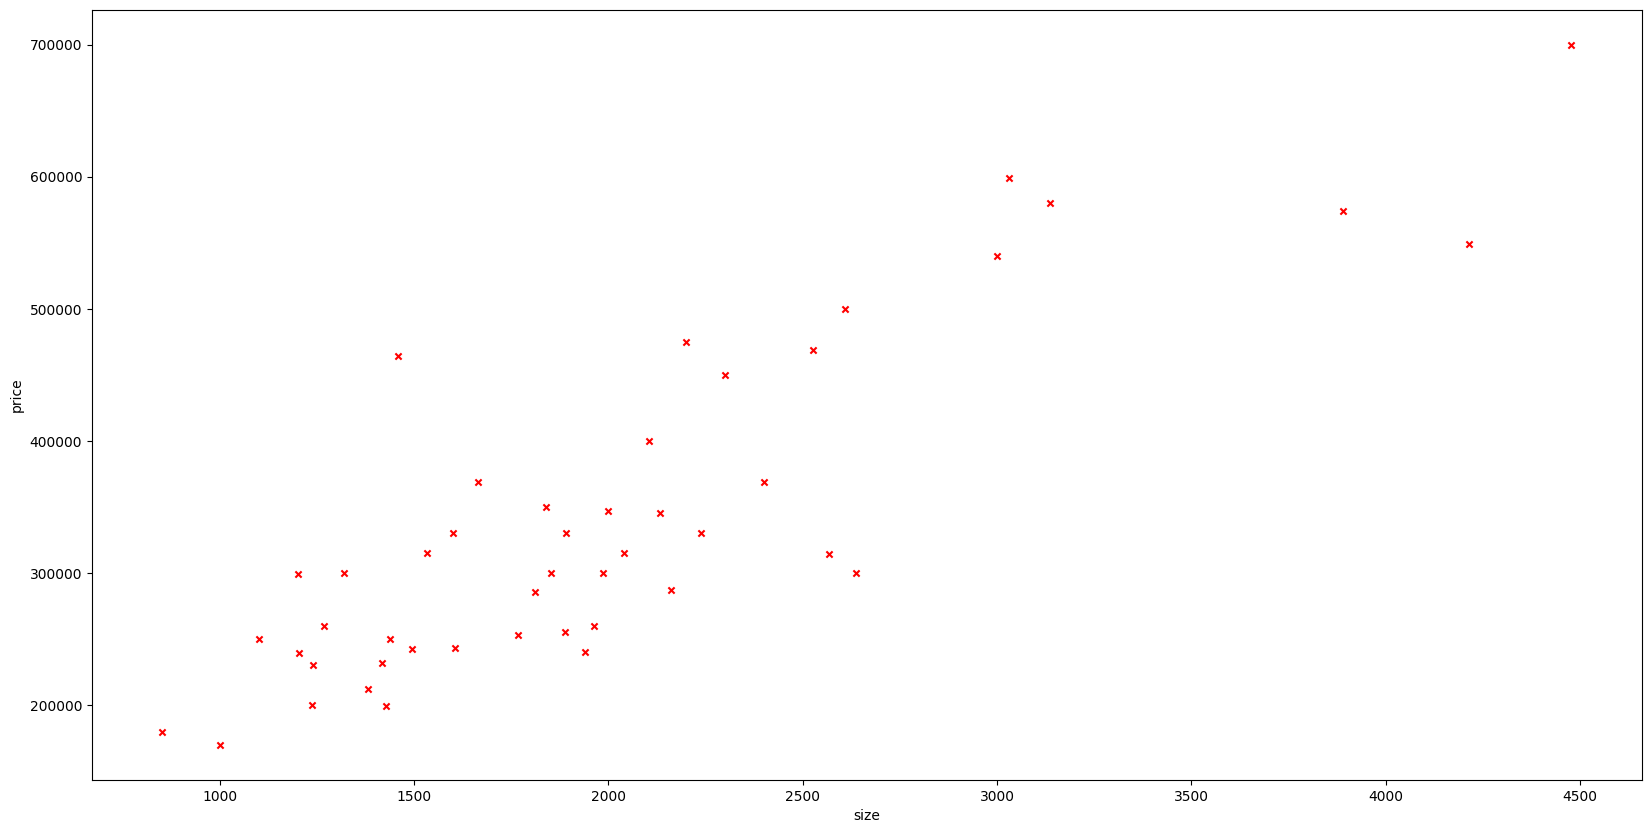

In [7]:
df.plot.scatter(x="size", y="price", c="red", marker="x", figsize=(20, 10))

In [8]:
# 독립변수x, 종속변수y

In [9]:
def 비용함수():
    y_hat = [100, 105, 110, 120, ...]  # 100개 예측치
    y_real = [102, 106, 123, 126, ...]  # 100개 실제값
    sum_ = 0
    n = 100
    for i in range(n):
        sum_ += ((y_hat - y_real) ** 2) / n
    return sum_

# 비용함수
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$


# 경사하강법

    \begin{align}
    \frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\end{align}
\begin{align}
\frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
    \end{align}

In [16]:
def 비용함수(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        y_hat = w * x[i] + b
        cost += (y_hat - y[i]) ** 2
    total_cost = (1 / 2 * m) * cost
    return total_cost

In [17]:
def 그래디언트(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat = w * x[i] + b
        dj_dw_i = (y_hat - y[i]) * x[i]
        dj_db_i = (y_hat - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [22]:
import copy

def 경사하강법(x, y, w_in, b_in, alpha, max_iter, 비용함수, 그래디언트):
    w = copy.deepcopy(w_in)
    J_history = []
    # w = w_in
    b = b_in

    for i in range(max_iter):
        dj_dw, dj_db = 그래디언트(x, y, w, b)
        b = b - dj_db * alpha
        w = w - dj_dw * alpha
    return w, b

In [40]:
import numpy as np

x_train = np.array([1, 3, 10])
y_train = np.array([15, 25, 60])

In [56]:
w_init = 0
b_init = 0
max_iter = 60000
alpha = 0.001

w_final, b_final = 경사하강법(x_train, y_train, w_init, b_init, alpha, max_iter, 비용함수, 그래디언트)

In [57]:
w_final

5.000000000045808

In [58]:
b_final

9.999999999643995

In [60]:
df.head()

,size,no_rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [61]:
x = df["size"]
y = df["price"]

In [63]:
w_init = 0
b_init = 0
max_iter = 60000
alpha = 0.001

w_final, b_final = 경사하강법(x, y, w_init, b_init, alpha, max_iter, 비용함수, 그래디언트)

C:\Users\hkit\AppData\Local\Temp\ipykernel_2156\1072684853.py:8: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw_i = (y_hat - y[i]) * x[i]
C:\Users\hkit\AppData\Local\Temp\ipykernel_2156\105558942.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - dj_dw * alpha


In [64]:
from sklearn.linear_model import SGDRegressor

In [65]:
# Stochastic Gradient Descent

In [95]:
model = SGDRegressor(alpha=0.000001, max_iter=100000)

In [85]:
model.fit(x, y)

SGDRegressor(alpha=1e-06, max_iter=10000)

In [86]:
x

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000],
       [1985],
       [1534],
       [1427],
       [1380],
       [1494],
       [1940],
       [2000],
       [1890],
       [4478],
       [1268],
       [2300],
       [1320],
       [1236],
       [2609],
       [3031],
       [1767],
       [1888],
       [1604],
       [1962],
       [3890],
       [1100],
       [1458],
       [2526],
       [2200],
       [2637],
       [1839],
       [1000],
       [2040],
       [3137],
       [1811],
       [1437],
       [1239],
       [2132],
       [4215],
       [2162],
       [1664],
       [2238],
       [2567],
       [1200],
       [ 852],
       [1852],
       [1203]], dtype=int64)

In [87]:
[2104, 1600, 2400, 1416]

[2104, 1600, 2400, 1416]

In [88]:
[[2104,],[1600, ], [2400,], [1416,]]

[[2104], [1600], [2400], [1416]]

In [89]:
x = np.array(df["size"]).reshape(-1, 1)

In [90]:
print(x)

[[2104]
 [1600]
 [2400]
 [1416]
 [3000]
 [1985]
 [1534]
 [1427]
 [1380]
 [1494]
 [1940]
 [2000]
 [1890]
 [4478]
 [1268]
 [2300]
 [1320]
 [1236]
 [2609]
 [3031]
 [1767]
 [1888]
 [1604]
 [1962]
 [3890]
 [1100]
 [1458]
 [2526]
 [2200]
 [2637]
 [1839]
 [1000]
 [2040]
 [3137]
 [1811]
 [1437]
 [1239]
 [2132]
 [4215]
 [2162]
 [1664]
 [2238]
 [2567]
 [1200]
 [ 852]
 [1852]
 [1203]]


In [115]:
model = SGDRegressor(alpha=1e+20, max_iter=100000000)
model.fit(x, y)

SGDRegressor(alpha=1e+20, max_iter=100000000)

In [116]:
w = model.coef_

In [117]:
b = model.intercept_

In [118]:
w, b

(array([2.90803418e+12]), array([4.68886159e+09]))

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
model.fit(x, y)

LinearRegression()

In [124]:
w = model.coef_
b = model.intercept_
print(w, b)

[134.52528772] 71270.49244872917


In [128]:
x[3], y[3]

(array([1416], dtype=int64), 232000)

In [129]:
w * x[3] + b

array([261758.29986059])